## Assumptions of Linear Regression
#### Hypothesis Testing
To run statistics on a univariate model, we start with two hypotheses — one null and one alternative.
* $H_0$ (Null hypothesis): $m$ = 0 (i.e., slope is flat)
* $H_A$ (Alternative hypothesis): $m \neq 0$ (i.e.., slope is not completely flat) 

In other words, we are testing to see if a predictor has a consistent effect on some target variable. We are NOT testing the magnitidute of the effect; simply whether or not there is one.




#### The 4 Assumptions of (Univariate) Linear Regression Hypothesis Testing
In order to confidently reject the null hypothesis and assert that some relationship exists, the below assumptions must first be met.
1. Linearity: There is a linear relation between Y and X
2. Normality: The error terms (residuals) are normally distributed
3. Homoscedasticity: The variance of the error terms is constant over all X values (homoscedasticity)
4. Independence: The error terms are independent

#### Multivariate assumptions

In [ ]:
The procedure for testing whether a predictor is statistically significant in a regression model typically involves the following steps:

Specify the null and alternative hypotheses: Formulate the null hypothesis (H₀) and alternative hypothesis (H₁) for the test. The null hypothesis states that the predictor has no effect on the response variable, while the alternative hypothesis suggests that there is a significant effect.

Fit the regression model: Use the appropriate regression method (e.g., ordinary least squares, logistic regression) to fit the regression model to your data. Obtain the estimated coefficients for each predictor, along with their standard errors.

Calculate the test statistic: Calculate the test statistic based on the estimated coefficient and its standard error. The test statistic depends on the specific regression model and hypothesis being tested. Common test statistics include t-statistic, z-statistic, or F-statistic.

Determine the critical value: Determine the critical value or significance level (α) at which you want to test the hypothesis. The significance level typically ranges from 0.01 to 0.05, depending on the desired level of confidence.

Compare the test statistic and critical value: Compare the calculated test statistic with the critical value. If the test statistic falls within the critical region (i.e., the calculated p-value is less than the significance level), you reject the null hypothesis and conclude that the predictor is statistically significant. If the test statistic does not fall within the critical region, you fail to reject the null hypothesis, indicating that the predictor is not statistically significant.

Interpret the results: Based on the conclusion from the hypothesis test, interpret the significance of the predictor. If the predictor is deemed statistically significant, it suggests that there is evidence of a relationship between the predictor and the response variable. If the predictor is not statistically significant, it implies that there is no significant evidence of an effect.

It's important to note that significance tests provide statistical evidence for or against the null hypothesis, but they should be interpreted alongside other factors such as effect size, practical significance, and the context of the problem being studied. Additionally, it's crucial to consider the assumptions and limitations of the regression model and the underlying data when interpreting the

### Assumption 1: Linearity
How can we test that our model linear model is appropriate for this data? If there is only one predictor, this is pretty easy to test with a scatter plot. We'll adapt this plot when using multiple predictors by viewing just the model residuals, instead.

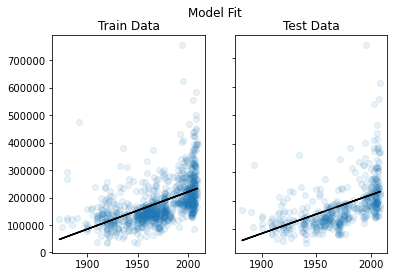

In [12]:
plot_model_predictions(x_train, y_train, y_pred_train, 
                       x_test, y_test, y_pred_test)

By eye, it appears that our data is only somewhat linear. There appears to be an exponential trend in the data that is not captured by the model. This observation is actually faily common — there may not always be a natural linear relationship between the predictor(s) and response variable.

#### Why do we care?
The predictions will be inaccurate because our model is underfitting (i.e., not adquately capturing the variance of the data). Furthermore, we can't trust statistical measures from a linear model when the linearity assumption is not being met.

#### How to remedy
To fix this problem, you can...

1. Add polynomial terms to some of the predictors (i.e., polynomial regression) or 
2. Apply nonlinear transformations (e.g., log transform)
3. Try adding additional variables to help capture the relationship between the predictors and the label. 

If none of those approaches work, you can also consider nonlinear models if you have a sufficiently large dataset (learning nonlinear relationships requires lots of data).

Let's try applying a log transformation to the response variable to see if that helps.

In [13]:
# Correct with log transformation
import numpy as np
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
reg_log = LinearRegression().fit(x_train,y_train_log)
y_pred_train_log = reg_log.predict(x_train)
y_pred_test_log = reg_log.predict(x_test)

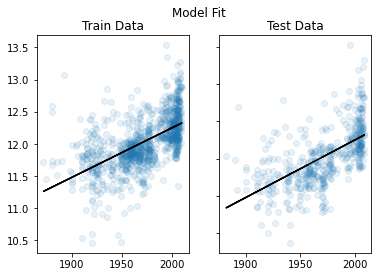

In [14]:
plot_model_predictions(x_train, y_train_log, y_pred_train_log, 
                       x_test, y_test_log, y_pred_test_log)

Note that, in the above plot, the y variable being plotted is the log of the sale prices. If we wanted to revert our plot to the raw format of the data, we would run the below code.

In [15]:
# 2) reverse log transformation (exponential)
y_pred_train_prime=np.exp(y_pred_train_log)
y_pred_test_prime=np.exp(y_pred_test_log)

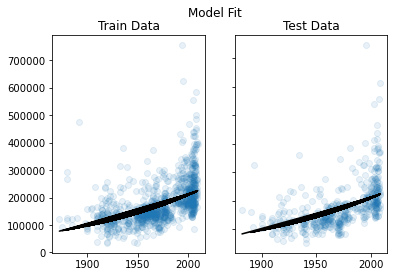

In [16]:
plot_model_predictions(x_train, y_train, y_pred_train_prime, 
                       x_test, y_test, y_pred_test_prime)

### Assumption 2: Normality of residuals
The error terms (residuals) must be normally distributed. Normally distributed residuals are necessary for estimating accurate standard errors for the model parameter estimates.

To test this assumption, we can create a **quantile-quantile plot (QQ-plot)** of the model residuals. Quantiles — often referred to as percentiles — indicate values in your data below which a certain proportion of the data falls. For instance, if data comes from a classical bell-curve Normal distrubtion with a mean of 0 and a standard deviation of 1, the 0.5 quantile, or 50th percentile, is 0 (half the data falls above 0, half below zero). The 90th percentile would lie right around @[INSERT_NUMBER]

@[INSERT_IMAGE_OF_NORMAL_DIST_WITH_QUANTILES_MARKED]

To better understand QQ-plots, we'll first generate some example data from a normal distribution

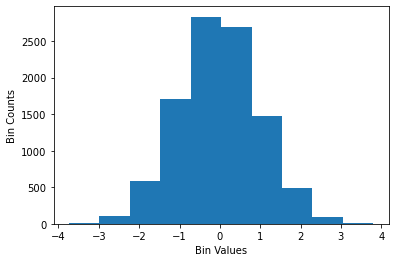

In [17]:
np.random.seed(0) # set seed for reproducibility
normal_data = np.random.normal(loc=0, scale=1, size=10000) # mean of 0, std of 1, 50 samples
normal_data.shape

plt.hist(normal_data);
plt.xlabel('Bin Values');
plt.ylabel('Bin Counts');

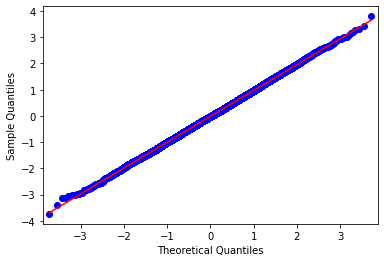

In [18]:
## create qq-plot
import statsmodels.api as sm
sm.qqplot(normal_data, line='s');

#### Unpacking the QQ-plot
To construct a QQ-plot, the raw data is first sorted from smaller to larger values. Then, empirical quantiles can be assigned to each sample in the dataset. These measurements can then be compared to theoretical quantiles from a normal distribution. Oftentimes, QQ-plots show zscores rather than actual quantile values since zscores can be interpreted more easily. 

**X-axis: Theoretical Quantiles**
This x-axis represents nothing but Z-values of standard normal distribution.
0.5 quantile corresponds to 50th percentile i.e. at 0 Z-score.
0.25 quantile or 25th percentile means -0.67 Z-score.
0.75 quantile or 75th percentile represents 0.67 Z-score.

**Y-axis: Sample Quantiles**
The y-axis captures the true z-scores of each observed sample in our dataset. The observed z-score can be compared to the expected z-score based on a datapoint's position in an ordered dataset.

**Red diagonal line**
Data drawn from a normal distribution fall along the line y = x in the Q-Q plot.

**Common Diagnostics**
1. Right-skewed: If the data falls above the red line (where y=x) where x > 0, that means that you have a right skewed distrution (long tail on the right side of the distrubtion). A right-skewed distribution will have have higher than expected z-scores for data that is greater than the mean (zscore = 0).
2. Left-skewed: If the data falls below the red line (where y=x) where x < 0, that means that you have a left skewed distrution (long tail on the left side of the distrubtion). This causes the sample distribtuion to have lower (more negative) than expected z-scores for data that is greater than the mean (zscore = 0).
3. Long tails / tall peak: Combination of 1&2 above — points below the mean (zscore = 0) will fall below the red line, and points above the mean will fall above the red line

What happens if we decrease the sample size of our simulation? Let's try to generate a QQ-plot containing just 500 samples.

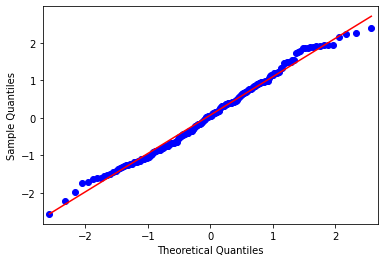

In [19]:
np.random.seed(0) # set seed for reproducibility
normal_data = np.random.normal(loc=0, scale=1, size=200) # mean of 0, std of 1, 50 samples
normal_data.shape

## create qq-plot
import statsmodels.api as sm
sm.qqplot(normal_data, line='s');

It is very common to see the ends of the Q-Q plot start to deviate from the straight line a bit — especially with smaller datasets. This has to due with not having enough samples to calculate the true underlying distribution behind a data generating process. How much deviation from the straight line is acceptable is up to the researcher's discretion to an extent. To help zero in on the goldilock's zone, let's see what happens when we create a QQ-plot using binomial data.

In [20]:
n, p = 1, .5  # number of trials, probability of each trial
print(n, p)
binomial_data = np.random.binomial(n, p, 500) # result of flipping a fair coin 500 times
binomial_data

1 0.5


array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

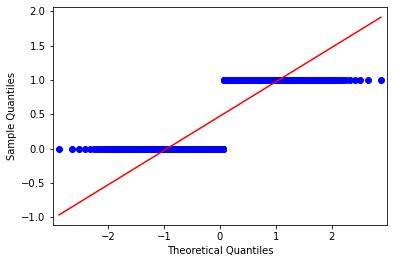

In [21]:
sm.qqplot(binomial_data, line='s');

We can see that the binomial distribution causes very large and noticeable deviations from the diagonal in our QQ-plot. You won't typically see a QQ-plot that shows such an extreme deviation from the diagonal (unless your data truly comes from a non-normal distribtion). More subtle effects include...

**Common Diagnostics**
1. Right-skewed: If the data falls above the red line (where y=x) where x > 0, that means that you have a right skewed distrution (long tail on the right side of the distrubtion). A right-skewed distribution will have have higher than expected z-scores for data that is greater than the mean (zscore = 0).
2. Left-skewed: If the data falls below the red line (where y=x) where x < 0, that means that you have a left skewed distrution (long tail on the left side of the distrubtion). This causes the sample distribtuion to have lower (more negative) than expected z-scores for data that is greater than the mean (zscore = 0).
3. Long tails / tall peak: Combination of 1&2 above — points below the mean (zscore = 0) will fall below the red line, and points above the mean will fall above the red line

Now that we understand QQ-plots better, let's try creating a QQ-plot of the model residuals. 

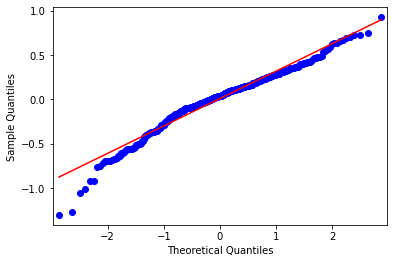

In [22]:
import statsmodels.api as sm

resid = y_pred_test_log - y_test_log
sm.qqplot(resid, line='s');

(array([  2.,   4.,  12.,  26.,  53., 138., 157.,  73.,  12.,   5.]),
 array([-1.30333711, -1.08048116, -0.85762522, -0.63476927, -0.41191333,
        -0.18905739,  0.03379856,  0.2566545 ,  0.47951045,  0.70236639,
         0.92522234]),
 <BarContainer object of 10 artists>)

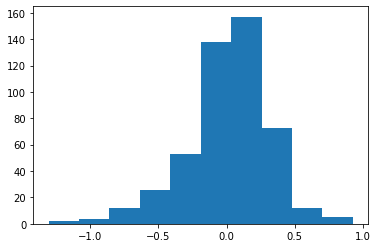

In [26]:
plt.hist(resid)

In [25]:
# Maybe include Shapiro-Wilk test of normality as well?
from scipy import stats
rng = np.random.default_rng()
# x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(resid)
shapiro_test

ShapiroResult(statistic=0.9669366478919983, pvalue=5.923087798009874e-09)

violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated.

Neither the dependent nor independent variable needs to be normally distributed. In fact they can have all kinds of loopy distributions. The normality assumption applies to the distribution of the errors (Yi−Yˆi).

### Assumption 3: Linearity


### Remedying issues with normality...
How to address it: Modify the model, fit a generalized linear model, or transform the response variable.

### Frame questions to explore
In this next section, we'll explore the use of univariate linear models to both (1) explain relationships in the data, and (2) form predictions of hypothetical sale prices. Specifically, we'll answer the following questions...

1. Which predictor variable yields the most accurate prediction of sale prices?
2. Which predictor variables have a statistically significant affect on sale price?